In [100]:
import torch

In [101]:
device = "cuda"  if torch.cuda.is_available() else "cpu"
device

'cpu'

# Get Data

In [102]:
import requests
from pathlib import Path
import zipfile

data_path = Path("data/")
image_path_train = data_path / "train"
image_path_test = data_path / "test"

if image_path_train.is_dir():
  print(f"{image_path_train} directory exists.")
else:
  print(f"Did not find {image_path_train} directory, creating one...")
  image_path_train.mkdir(parents=True, exist_ok=True)

if image_path_test.is_dir():
  print(f"{image_path_test} directory exists.")
else:
  print(f"Did not find {image_path_test} directory, creating one...")
  image_path_test.mkdir(parents=True, exist_ok=True)

data/train directory exists.
data/test directory exists.


In [103]:
!apt-get install git
!git init
!git remote add origin https://github.com/ThanawatRung/Durian_Ai.git
!git config core.sparseCheckout true
!echo "dataset_durian/" >> .git/info/sparse-checkout
!git pull origin main

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reinitialized existing Git repository in /content/.git/
error: remote origin already exists.
From https://github.com/ThanawatRung/Durian_Ai
 * branch            main       -> FETCH_HEAD
Already up to date.


# Make class folder in train and test folder

In [104]:
import os

# Define source and destination paths
source_dir = "/content/dataset_durian"
train_dir = "/content/data/train"
test_dir = "/content/data/test"

# List of classes (folders)
classes = ['AlgalLeafSpot', 'LeafBlight', 'LeafSpot', 'NoDisease']

for class_name in classes:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

# Split the data for train and test 70,30

In [105]:
import shutil
from sklearn.model_selection import train_test_split

for class_name in classes:
    # Get all images from the class folder
    class_dir = os.path.join(source_dir, class_name)
    images = os.listdir(class_dir)
    images = [img for img in images if img.endswith(".jpg") or img.endswith(".png")]

    # Split images into train (70%) and test (30%)
    train_images, test_images = train_test_split(images, test_size=0.3, random_state=42)

    # Copy the images to the corresponding train/test directories
    for img in train_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(train_dir, class_name, img))

    for img in test_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(test_dir, class_name, img))

# Look at the amout of picture in folder

In [106]:
class_AlgalLeafSpot_train  = os.path.join(train_dir,classes[0])
images_AlgalLeafSpot_train = os.listdir(class_AlgalLeafSpot_train)
print(f"There are {len(images_AlgalLeafSpot_train)} images in {class_AlgalLeafSpot_train}")

There are 73 images in /content/data/train/AlgalLeafSpot


In [107]:
class_AlgalLeafSpot_test  = os.path.join(test_dir,classes[0])
images_AlgalLeafSpot_test = os.listdir(class_AlgalLeafSpot_test)
print(f"There are {len(images_AlgalLeafSpot_test)} images in {class_AlgalLeafSpot_test}")

There are 32 images in /content/data/test/AlgalLeafSpot


In [108]:
class_LeafBlight_train  = os.path.join(train_dir,classes[1])
images_LeafBlight_train = os.listdir(class_LeafBlight_train)
print(f"There are {len(images_LeafBlight_train)} images in {class_LeafBlight_train}")

There are 73 images in /content/data/train/LeafBlight


In [109]:
class_LeafBlight_test  = os.path.join(test_dir,classes[1])
images_LeafBlight_test = os.listdir(class_LeafBlight_test)
print(f"There are {len(images_LeafBlight_test)} images in {class_LeafBlight_test}")

There are 32 images in /content/data/test/LeafBlight


In [110]:
class_LeafSpot_train = os.path.join(train_dir,classes[2])
images_LeafSpot_train = os.listdir(class_LeafSpot_train)
print(f"There are {len(images_LeafSpot_train)} images in {class_LeafSpot_train}")

There are 73 images in /content/data/train/LeafSpot


In [111]:
class_LeafSpot_test = os.path.join(test_dir,classes[2])
images_LeafSpot_test = os.listdir(class_LeafSpot_test)
print(f"There are {len(images_LeafSpot_test)} images in {class_LeafSpot_test}")

There are 32 images in /content/data/test/LeafSpot


In [112]:
class_NoDisease_train = os.path.join(train_dir,classes[3])
images_NoDisease_train = os.listdir(class_NoDisease_train)
print(f"There are {len(images_NoDisease_train)} images in {class_NoDisease_train}")

There are 73 images in /content/data/train/NoDisease


In [113]:
class_NoDisease_test = os.path.join(test_dir,classes[3])
images_NoDisease_test = os.listdir(class_NoDisease_test)
print(f"There are {len(images_NoDisease_test)} images in {class_NoDisease_test}")

There are 32 images in /content/data/test/NoDisease


# Visualize an image

Image class: AlgalLeafSpot
Random image path: /content/data/train/AlgalLeafSpot/AlgalLeafSpot018_jpg.rf.d247280929a103fe7bc76eccb8459edf.jpg

Image height: 640
Image width: 640


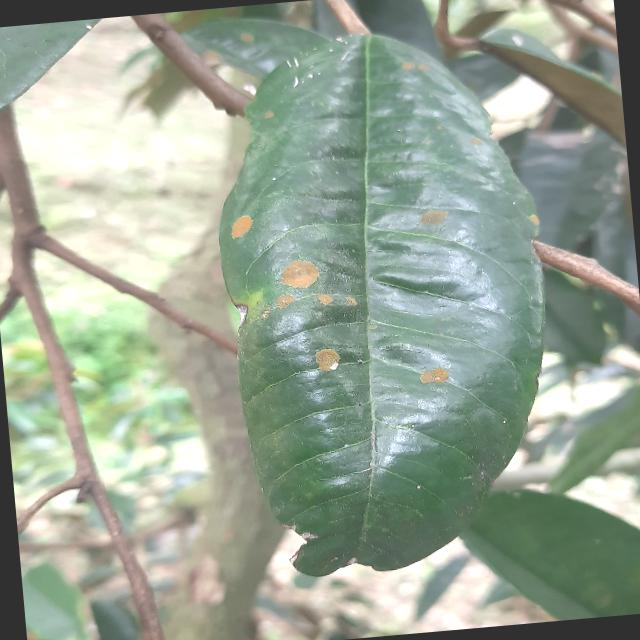

In [114]:
import random
from PIL import Image

#random.seed(42)

image_path_list = list(Path(class_AlgalLeafSpot_train).glob("*")) # can change class to look other image.
image_path = random.choice(image_path_list)

random_image_class = image_path.parent.stem
print(f"Image class: {random_image_class}")

img = Image.open(image_path)

# Print metadata
print(f"Random image path: {image_path}")
print(f"\nImage height: {img.height}")
print(f"Image width: {img.width}")
img

# Transforming data


In [115]:
from torchvision import transforms,datasets
from torch.utils.data import DataLoader

In [116]:
# Define transformations with augmentation
data_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(30),
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.3, 0.3, 0.3), (0.5, 0.5, 0.5))
])

In [117]:
data_transform(img).shape

torch.Size([3, 128, 128])

# Look at the picture that transform

In [118]:
from matplotlib import pyplot as plt

def plot_transformed_images(image_paths, transform, n=3, seed=None):
  """
  Selected random images from path of images and loads/transforms them
  then plots the original vs transformed version
  """

  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1,ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nSize: {f.size}")
      ax[0].axis(False)

      #Transform and plot target image
      transformed_image = transform(f).permute(1,2,0) #note we will need to change  for matplotlib (C,H,W) -> (H,W,C)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed \nShape: {transformed_image.shape}")
      ax[1].axis(False)

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=30)

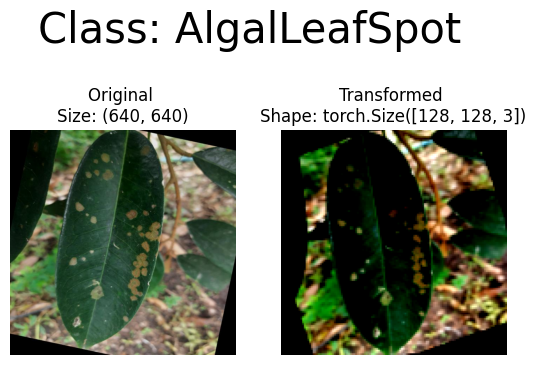

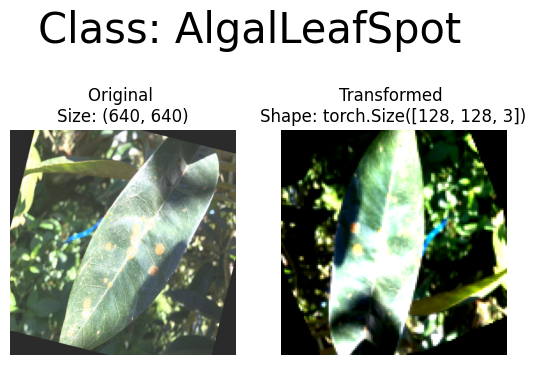

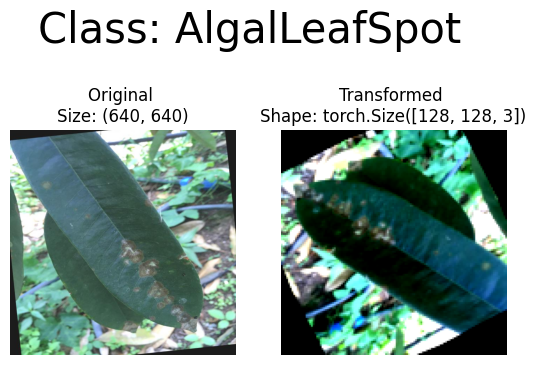

In [119]:
plot_transformed_images(image_path_list, data_transform)

# Loading image data

In [120]:
train_data = datasets.ImageFolder(root='/content/data/train',
                                  transform=data_transform, # a transform for the data
                                  target_transform=None) # a transform for the label/target

test_data = datasets.ImageFolder(root='/content/data/test',
                                 transform=data_transform,
                                 target_transform=None)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 292
    Root location: /content/data/train
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               RandomVerticalFlip(p=0.5)
               RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=(0.3, 0.3, 0.3), std=(0.5, 0.5, 0.5))
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 128
    Root location: /content/data/test
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               RandomVerticalFlip(p=0.5)
               RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=(

In [121]:
class_names = train_data.classes
class_names

['AlgalLeafSpot', 'LeafBlight', 'LeafSpot', 'NoDisease']

In [122]:
class_dict = train_data.class_to_idx
class_dict

{'AlgalLeafSpot': 0, 'LeafBlight': 1, 'LeafSpot': 2, 'NoDisease': 3}

In [123]:
len(train_data), len(test_data)

(292, 128)

In [124]:
train_data[0][0].shape

torch.Size([3, 128, 128])

# Turn data in to dataloader

In [125]:
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)

print(f"train_dataloader:{len(train_dataloader)},test_dataloader:{len(test_dataloader)}")
print(f"train_data:{len(train_data)},test_data:{len(test_data)}")


train_dataloader:10,test_dataloader:4
train_data:292,test_data:128


In [126]:
img,label = next(iter(train_dataloader))

# Batch size will now be 1 , you can change the batch size if you like
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 128, 128]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


In [127]:
img,label

(tensor([[[[-0.6000, -0.6000, -0.6000,  ..., -0.6000, -0.6000, -0.6000],
           [-0.6000, -0.6000, -0.6000,  ..., -0.6000, -0.6000, -0.6000],
           [-0.6000, -0.6000, -0.6000,  ..., -0.6000, -0.6000, -0.6000],
           ...,
           [-0.6000, -0.6000, -0.6000,  ..., -0.6000, -0.6000, -0.6000],
           [-0.6000, -0.6000, -0.6000,  ..., -0.6000, -0.6000, -0.6000],
           [-0.6000, -0.6000, -0.6000,  ..., -0.6000, -0.6000, -0.6000]],
 
          [[-0.6000, -0.6000, -0.6000,  ..., -0.6000, -0.6000, -0.6000],
           [-0.6000, -0.6000, -0.6000,  ..., -0.6000, -0.6000, -0.6000],
           [-0.6000, -0.6000, -0.6000,  ..., -0.6000, -0.6000, -0.6000],
           ...,
           [-0.6000, -0.6000, -0.6000,  ..., -0.6000, -0.6000, -0.6000],
           [-0.6000, -0.6000, -0.6000,  ..., -0.6000, -0.6000, -0.6000],
           [-0.6000, -0.6000, -0.6000,  ..., -0.6000, -0.6000, -0.6000]],
 
          [[-0.6000, -0.6000, -0.6000,  ..., -0.6000, -0.6000, -0.6000],
           [-

# Create the model ResNet18 Transfer learning

In [128]:
from torch import nn
import torchvision
from torchvision import models
from sklearn.metrics import accuracy_score

class TransferLearningModel(nn.Module):
    def __init__(self, num_classes):
        super(TransferLearningModel, self).__init__()
        self.model = models.resnet18(pretrained=True)
        in_features = self.model.fc.in_features
        self.model.fc = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.model(x)

# Train model

In [129]:
from tqdm.auto import tqdm

num_classes = len(class_names)  # Adjust based on your dataset
model = TransferLearningModel(num_classes=num_classes)

# Hyperparameters
learning_rate = 0.0001
num_epochs = 10

# Initialize loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Training loop
for epoch in tqdm(range(num_epochs)):
    model.train()
    running_loss = 0.0
    correct_preds = 0
    total_preds = 0

    for images, labels in train_dataloader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total_preds += labels.size(0)
        correct_preds += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_data)
    epoch_accuracy = correct_preds / total_preds

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')

# Evaluation
model.eval()
all_labels = []
all_preds = []

with torch.inference_mode():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

accuracy = accuracy_score(all_labels, all_preds)
print(f'Test Accuracy: {accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/10, Loss: 1.2836, Accuracy: 0.4760
Epoch 2/10, Loss: 0.4959, Accuracy: 0.8425
Epoch 3/10, Loss: 0.2485, Accuracy: 0.9315
Epoch 4/10, Loss: 0.1322, Accuracy: 0.9726
Epoch 5/10, Loss: 0.1297, Accuracy: 0.9726
Epoch 6/10, Loss: 0.0830, Accuracy: 0.9726
Epoch 7/10, Loss: 0.0407, Accuracy: 0.9966
Epoch 8/10, Loss: 0.0468, Accuracy: 0.9829
Epoch 9/10, Loss: 0.0402, Accuracy: 0.9829
Epoch 10/10, Loss: 0.0773, Accuracy: 0.9726
Test Accuracy: 0.9219


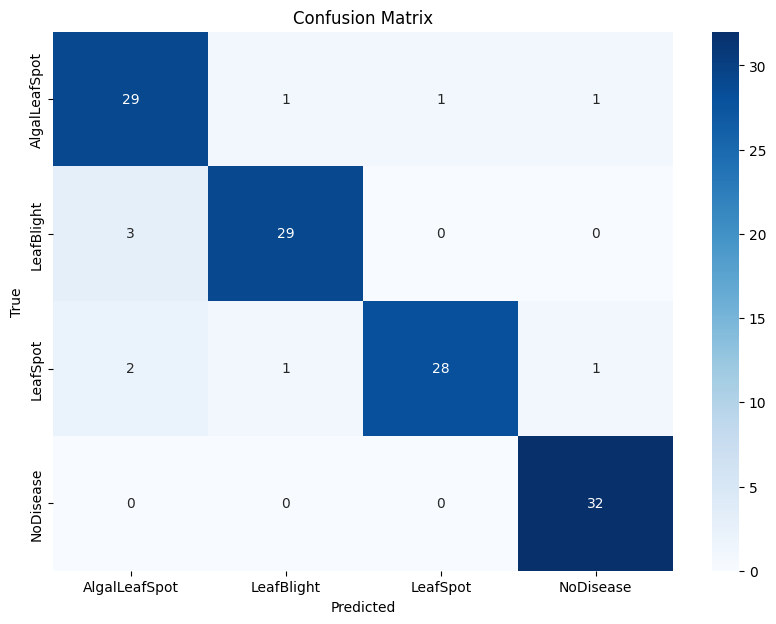

In [130]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(all_labels, all_preds, labels=list(range(num_classes)))

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [131]:
prediction = model(img.to(device))

In [132]:
model.eval()
all_labels = []
all_preds = []

with torch.inference_mode():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())
        print(labels.cpu().numpy())
        print(predicted.cpu().numpy())
        print('---------------------------')


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0]
---------------------------
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1]
---------------------------
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2]
---------------------------
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
---------------------------
